# Rain prediction in Australia


<img src="../images/1786.webp" height=500 width=700>

# Overview 
The purpose of this project is to use weather dataset from Kaggle to predict rainfall for the next day based on the data about today's weather.

During the analysis:
1. I analyze data.
2. I deal with missing values.
3. I build few different classifiers and train them.
4. I select two best classifiers from step and tune them to improve performance.
5. I test tuned classifiers on the data that would be put aside and not used in the training/validation purposes.

# Business Problem

* Predicting rainy weather for the next day is a very important task. 
* It plays a role in farming and other kinds of business, including restaurants, museums, etc.. 
* Good weather forecast plays important role for tourist too.
* Usually weather is predicted by using complicated deterministic models involving partial differential equations. 
* I would like to see how well the rain can be predicted by using Machine Learning.
* At the end I will recommend the best (based on this research) system to predict rainy days.

***
# Data Description
The file called ['weatherAUS.csv'](data/weatherAUS.csv) holds the data for this project.
> Description from Kaggle: "This dataset contains about 10 years of daily weather observations from many locations across Australia. RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more."

#### Column Names and descriptions for Wheather Data Set

* **Date** - date
* **Location** - location
* **MinTemp** - minimum temperature for the day
* **MaxTemp** - maximum temperature for the day
* **Rainfall** - rainfall for the day
* **Evaporation** - evaporation for the day
* **Sunshine** - amount of sunlight
* **WindGustDir** - direction of the wind
* **WindGustSpeed** - speed of wind gust
* **WindDir9am** - wind direction at 9am
* **WindDir3pm** - wind direction at 3pm
* **WindSpeed9am** - wind speed at 9am
* **WindSpeed3pm** - wind speed at 3pm
* **Humidity9am** - humidity at 9am 
* **Humidity3pm** - humidity at 3pm
* **Pressure9am** - atmospheric pressure at 9am
* **Pressure3pm** - atmospheric pressure at 3pm
* **Cloud9am** - cloudiness at 9am
* **Cloud3pm** - cloudiness at 3pm
* **Temp9am** - air temperature at 9am
* **Temp3pm** - air temperature at 3pm
* **RainToday** - does it rain today or not
* **RainTomorrow** - does it rain tomorrow

# Import all standard modules

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import os
import sys


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [52]:
# Import functions from the package "tools"(created by Y. Kostrov)

In [53]:
from tools import fill_missing_values, create_month, print_missing
from tools import assessClassifier, testClassifier
from tools import modify_data, convert_number_to_month

***
# Define supporting function
***

In [54]:
def convert_to_numeric(val):
    if val == "No":
        return 0
    else:
        return 1

In [55]:
import warnings # suppress warnings
warnings.filterwarnings('ignore') # suppress warnings

# 1. Load and Research the Data 

In [56]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [57]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [58]:
df.info() # Zoom in on the data types for the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [59]:
corr_matrix = df.corr()
corr_matrix # print correlation matrix 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [60]:
new_df = df.copy()
new_df.RainTomorrow = df.RainTomorrow.apply(convert_to_numeric).copy()
new_df.RainTomorrow.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

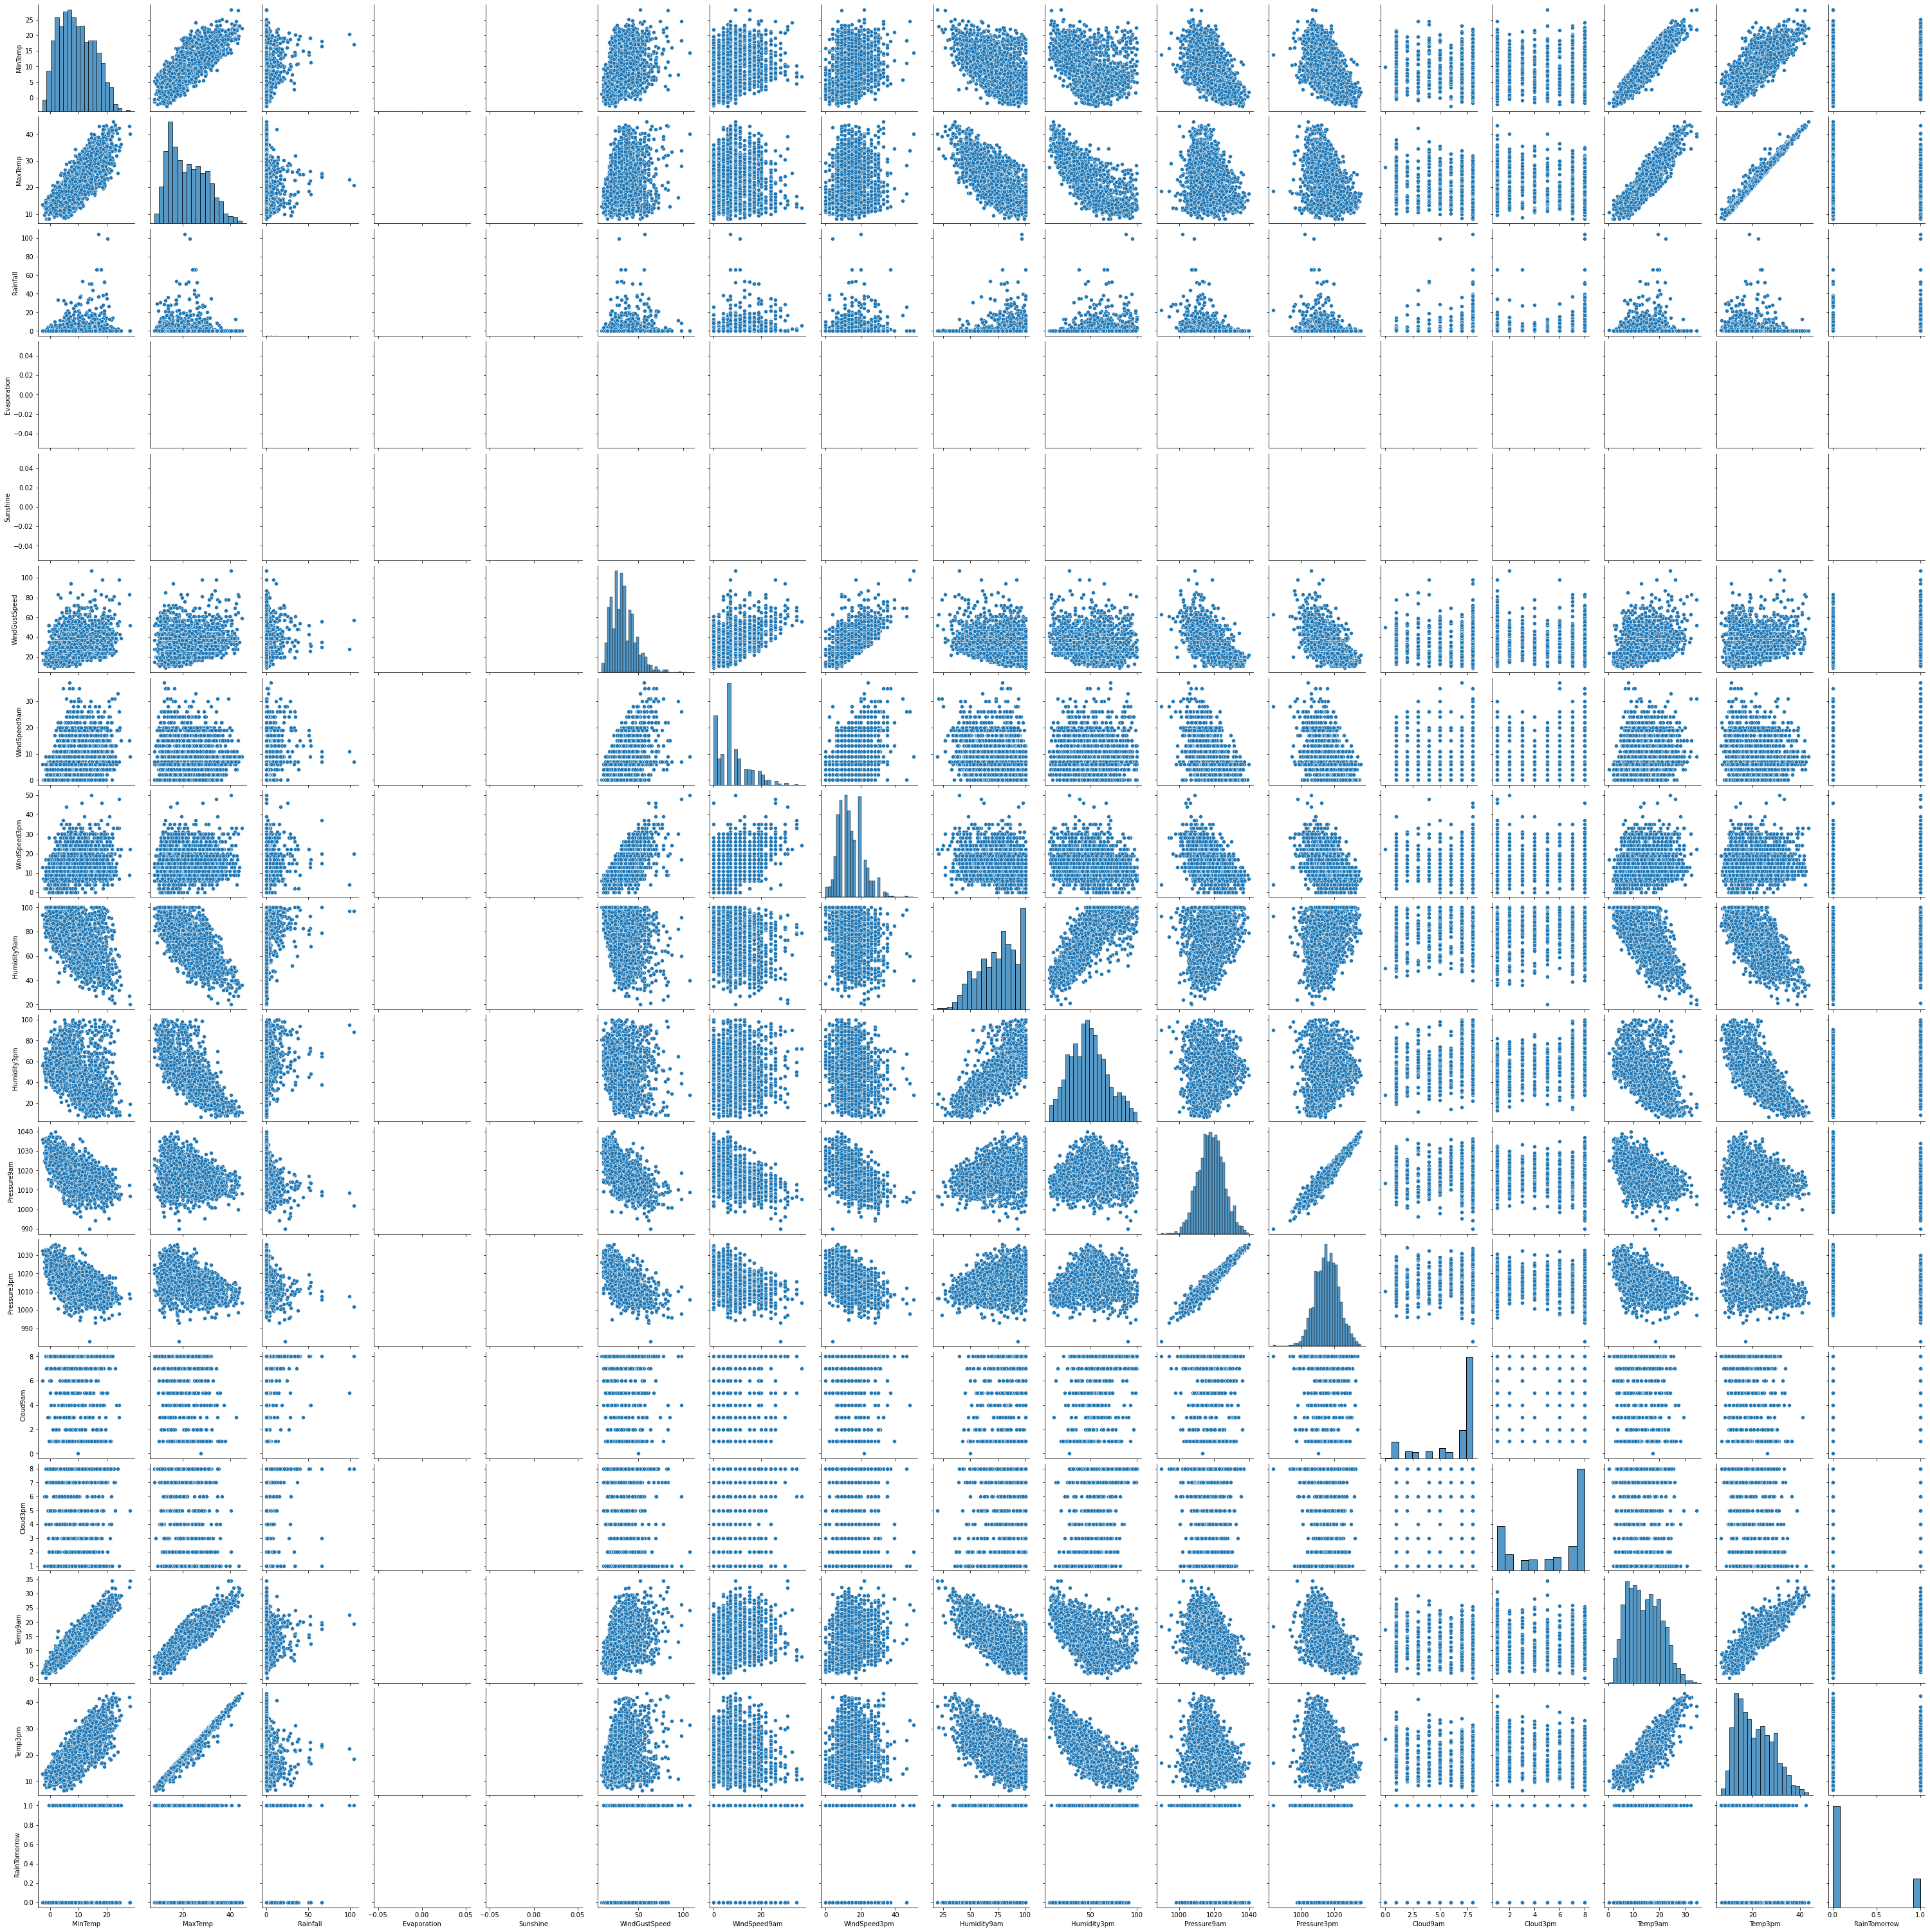

In [61]:
sns.pairplot(new_df[:2000]) # Build pair plot for first 2000 values(otherwise takes too long)

In [62]:
fontsize = 20;

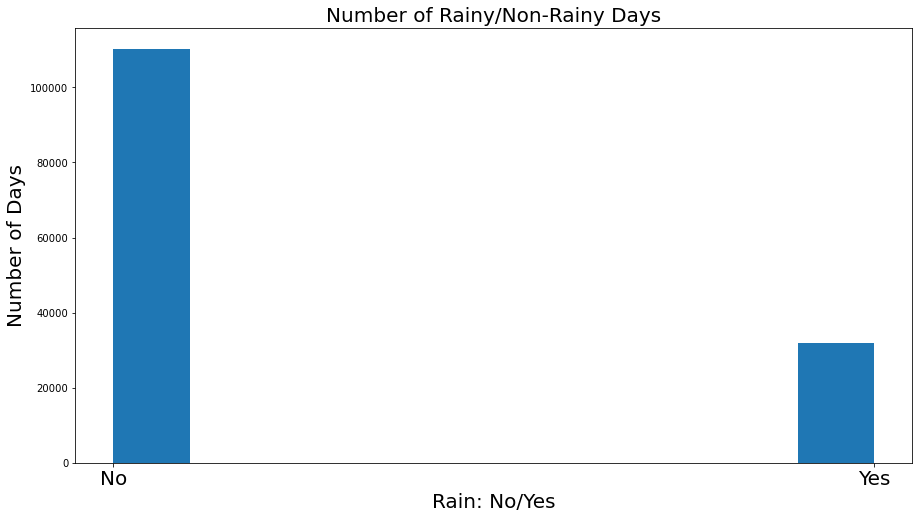

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize=(15, 8));
ax = plt.axes
plt.title("Number of Rainy/Non-Rainy Days",fontsize=fontsize);
plt.hist(df.RainTomorrow.dropna(axis=0))
plt.xlabel("Rain: No/Yes",fontsize=fontsize)
plt.ylabel("Number of Days", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.show()
plt.savefig("../images/rainydays.png")

In [64]:
create_month(new_df)

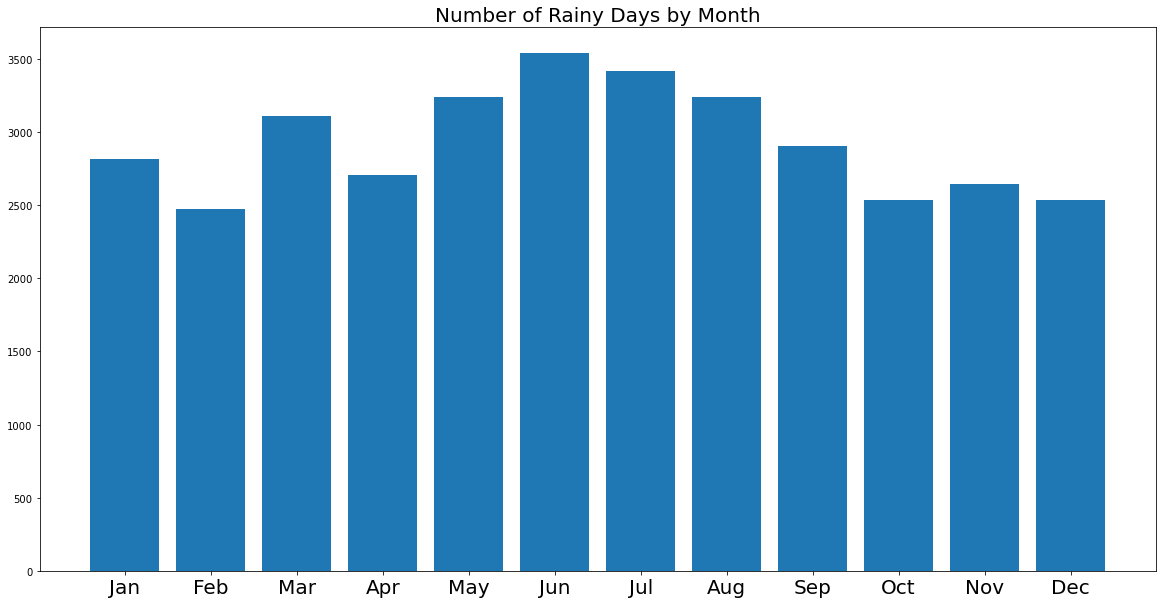

<Figure size 432x288 with 0 Axes>

In [65]:
r = new_df.groupby('Month')['RainTomorrow'].sum()
r = r.reset_index()
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(r.Month.apply(convert_number_to_month),r.RainTomorrow);
plt.title("Number of Rainy Days by Month",fontsize=fontsize);
plt.xticks(fontsize=fontsize)
plt.show()
plt.savefig("../images/rainmonthly.png")

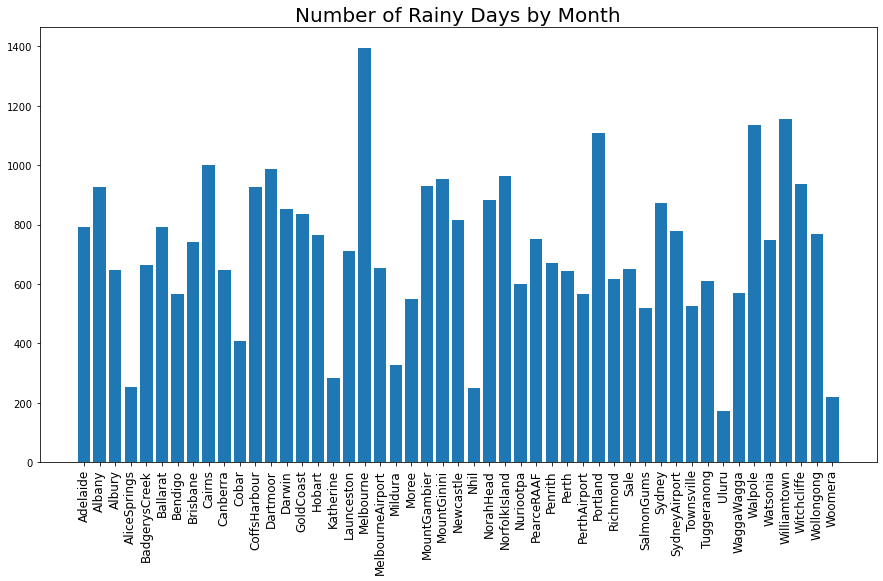

<Figure size 432x288 with 0 Axes>

In [66]:
r = new_df.groupby('Location')['RainTomorrow'].sum()
r = r.reset_index()
plt.figure(figsize=(15,8));
plt.bar(r.Location,r.RainTomorrow);
plt.title("Number of Rainy Days by Month",fontsize=fontsize);
plt.xticks(rotation='vertical',fontsize=12)
plt.show()
plt.savefig("../images/rainbyloc.png")

**Comments on the pairplots: There are few linear relations with high values of the r pearson coefficient.**

***
# Split the data to put a test dataset away and not use it until the very end  
***

In [67]:
X = df.drop('RainTomorrow',axis=1) # Create the data without target column
y = df.RainTomorrow # assign the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # split the data into train/test datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0) # split the data second time into train/validation

***
# Prepare Data 
***

***
### It seems logical to create a column with the "Month" and drop the column with the "Date". I will call create_month function to do that.
***

In [68]:
create_month(X_train)
X_train.head() # Check the result

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
23230,NorfolkIsland,21.1,24.7,0.0,8.0,12.3,E,59.0,E,E,...,69.0,61.0,1017.6,1016.2,4.0,3.0,23.4,23.1,No,1
44469,Wollongong,13.0,20.3,0.2,NaN,NaN,W,31.0,NNW,SSE,...,59.0,65.0,1023.8,1023.1,NaN,NaN,17.8,18.8,No,6
59687,Bendigo,4.5,16.4,1.2,0.8,NaN,ESE,39.0,SSE,SSE,...,86.0,58.0,1018.6,1019.0,NaN,1.0,9.6,15.7,Yes,5
49610,Tuggeranong,7.2,15.2,0.2,NaN,NaN,NW,41.0,N,NW,...,95.0,52.0,1020.9,1019.9,NaN,NaN,10.7,13.7,No,7
75141,Portland,6.8,11.9,2.6,1.2,3.7,N,31.0,N,NNW,...,87.0,63.0,1024.9,1021.9,8.0,7.0,7.5,11.7,Yes,6


***
# Dealing with missing values...
### Checking missing values: total and percent
***

In [69]:
print_missing(X_train) # Print number of missing values together with percent

**************************************************
               Total   Percent
Sunshine       34037  0.477545
Evaporation    30684  0.430502
Cloud3pm       28943  0.406075
Cloud9am       27301  0.383038
Pressure9am     7375  0.103472
Pressure3pm     7373  0.103444
WindDir9am      5078  0.071245
WindGustDir     5025  0.070502
WindGustSpeed   4995  0.070081
Humidity3pm     2208  0.030979
WindDir3pm      2034  0.028537
Temp3pm         1740  0.024412
Rainfall        1637  0.022967
RainToday       1637  0.022967
WindSpeed3pm    1490  0.020905
Humidity9am     1296  0.018183
WindSpeed9am     836  0.011729
Temp9am          833  0.011687
MinTemp          714  0.010018
MaxTemp          623  0.008741
Month              0  0.000000
Location           0  0.000000
**************************************************


***
## There are a lot of missing values in nnunmerical columns.<br>
* ## I don't want to drop all these values. 
* ## I am going to use the median of the values for this column with the same location and the same month to fill in the missing values.
* ## I will, also, create an array called "save" with all the data that is inserted for missing values to use it later for the missing value for the test data that I put aside. "save" array is later converted into a data frame "saved_median" so it would be easier to use. 
***

In [70]:
save = [] # preparing an empty array to store the median values we use here to re-use later for Test Data 
cols = [cl for cl in X_train.columns if X_train[cl].dtype in ['float64']] # Numerical Columns
for location in X_train.Location.unique():
    print(f"Working on Location: {location}")
    for month in X_train.Month.unique():
        save_info = [location]
        for column in cols:
            median_for_month = X_train[(X_train.Location == location) 
                                           & (X_train.Month == month)][column].median()
            if np.isnan(median_for_month):
                median_for_month = X_train[(X_train.Month == month)][column].median()
            idx = list(X_train[(X_train.Location == location)
                                     & (X_train.Month == month)
                                     & (X_train[column].isna())].index)
            X_train.loc[idx,column] = median_for_month
            save_info.append(median_for_month)
        save_info.append(month)
        save.append(save_info)

Working on Location: NorfolkIsland
Working on Location: Wollongong
Working on Location: Bendigo
Working on Location: Tuggeranong
Working on Location: Portland
Working on Location: MountGinini
Working on Location: Penrith
Working on Location: Launceston
Working on Location: WaggaWagga
Working on Location: Mildura
Working on Location: Nuriootpa
Working on Location: Albany
Working on Location: GoldCoast
Working on Location: BadgerysCreek
Working on Location: Moree
Working on Location: Williamtown
Working on Location: Walpole
Working on Location: Hobart
Working on Location: Sydney
Working on Location: Newcastle
Working on Location: Witchcliffe
Working on Location: Woomera
Working on Location: Albury
Working on Location: Cobar
Working on Location: Nhil
Working on Location: SydneyAirport
Working on Location: PearceRAAF
Working on Location: Brisbane
Working on Location: Sale
Working on Location: Ballarat
Working on Location: Townsville
Working on Location: Richmond
Working on Location: AliceS

In [71]:
X_train.head() # Check if everything went okay

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
23230,NorfolkIsland,21.1,24.7,0.0,8.0,12.3,E,59.0,E,E,...,69.0,61.0,1017.6,1016.2,4.0,3.0,23.4,23.1,No,1
44469,Wollongong,13.0,20.3,0.2,2.0,6.1,W,31.0,NNW,SSE,...,59.0,65.0,1023.8,1023.1,8.0,8.0,17.8,18.8,No,6
59687,Bendigo,4.5,16.4,1.2,0.8,7.1,ESE,39.0,SSE,SSE,...,86.0,58.0,1018.6,1019.0,7.0,1.0,9.6,15.7,Yes,5
49610,Tuggeranong,7.2,15.2,0.2,2.2,6.6,NW,41.0,N,NW,...,95.0,52.0,1020.9,1019.9,6.0,6.0,10.7,13.7,No,7
75141,Portland,6.8,11.9,2.6,1.2,3.7,N,31.0,N,NNW,...,87.0,63.0,1024.9,1021.9,8.0,7.0,7.5,11.7,Yes,6


In [72]:
saved_median = pd.DataFrame(save,columns=['Location']+cols+ ['Month']) # Save the values I used to fill in missing ones for later use as data frame
saved_median.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
0,NorfolkIsland,19.70,24.8,0.0,6.0,8.8,41.0,22.0,24.0,74.0,70.0,1014.05,1013.2,6.0,5.0,22.7,23.4,1
1,NorfolkIsland,15.10,19.6,0.4,3.0,6.4,43.0,19.0,20.0,68.5,65.0,1019.00,1017.2,6.0,6.0,17.9,18.6,6
2,NorfolkIsland,16.40,21.2,0.4,3.4,7.1,43.0,19.0,20.0,68.0,66.0,1017.90,1016.3,5.0,5.0,19.3,19.8,5
3,NorfolkIsland,14.00,18.7,0.8,3.4,7.1,46.0,20.0,20.0,70.0,65.0,1020.00,1018.2,5.0,5.0,16.7,17.6,7
4,NorfolkIsland,16.45,21.6,0.0,5.8,9.3,37.0,19.0,20.0,65.0,64.0,1019.25,1017.2,6.0,5.0,19.7,20.4,11


## Check how balanced the data is for the target column

In [73]:
y_train.value_counts()

No     54082
Yes    15595
Name: RainTomorrow, dtype: int64

## It is not balanced but it is not too bad. I will see how classifiers perform on this data before dealing with imbalance.

# 2. Data preprocessing

In [74]:
num_columns = [column for column in X_train.columns if X_train[column].dtype == 'float64'] # Save numerical columns into array so it is easier to use
str_columns= ['WindGustDir','WindDir9am','WindDir3pm','Location'] # Save object columns into array so it is easier to use

In [75]:

num_pipline = Pipeline([
    ('std_scaler', StandardScaler()),
]) # Define a pipeline for scaling the data

In [76]:
X_train[num_columns] = num_pipline.fit_transform(X_train[num_columns])
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
23230,NorfolkIsland,1.391806,0.212409,-0.273737,0.821634,1.409146,E,1.437525,E,E,...,-0.001706,0.452784,-0.010630,0.135666,-0.341172,-0.808201,0.991661,0.204399,No,1
44469,Wollongong,0.126139,-0.407525,-0.250214,-0.912989,-0.659695,W,-0.681232,NNW,SSE,...,-0.531144,0.647227,0.896009,1.156346,1.272847,1.399723,0.130996,-0.414659,No,6
59687,Bendigo,-1.202029,-0.957011,-0.132597,-1.259913,-0.326011,ESE,-0.075873,SSE,SSE,...,0.898339,0.306951,0.135602,0.549855,0.869343,-1.691370,-1.129264,-0.860956,Yes,5
49610,Tuggeranong,-0.780140,-1.126084,-0.250214,-0.855168,-0.492853,NW,0.075467,N,NW,...,1.374833,0.015286,0.471936,0.682987,0.465838,0.516553,-0.960204,-1.148890,No,7
75141,Portland,-0.842643,-1.591033,0.032067,-1.144272,-1.460537,N,-0.681232,N,NNW,...,0.951283,0.550005,1.056865,0.978836,1.272847,0.958138,-1.452013,-1.436824,Yes,6


***
## Let's encode categorical features using one-hot-encoding.
***

In [77]:
ohe = pd.get_dummies(data=X_train, columns=str_columns,drop_first=True)
ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71275 entries, 23230 to 15774
Columns: 111 entries, MinTemp to Location_Woomera
dtypes: float64(16), int64(1), object(1), uint8(93)
memory usage: 19.2+ MB


In [78]:
from sklearn import preprocessing

ohe['RainToday'] = X_train['RainToday'].astype(str)
ohe['RainTomorrow'] =y_train.astype(str)

lb = preprocessing.LabelBinarizer()

ohe['RainToday'] = lb.fit_transform(ohe['RainToday'])
ohe['RainTomorrow'] = lb.fit_transform(ohe['RainTomorrow'])

**Drop missing values and create target column y and data X**

In [79]:
ohe = ohe.dropna()
y_train = ohe['RainTomorrow']
X_train = ohe.drop(['RainTomorrow'], axis=1)

In [80]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
23230,1.391806,0.212409,-0.273737,0.821634,1.409146,1.437525,2.794408,1.402405,-0.001706,0.452784,...,0,0,0,0,0,0,0,0,0,0
44469,0.126139,-0.407525,-0.250214,-0.912989,-0.659695,-0.681232,-0.905678,-0.413595,-0.531144,0.647227,...,0,0,0,0,0,0,0,0,1,0
59687,-1.202029,-0.957011,-0.132597,-1.259913,-0.326011,-0.075873,0.551932,0.380905,0.898339,0.306951,...,0,0,0,0,0,0,0,0,0,0
49610,-0.780140,-1.126084,-0.250214,-0.855168,-0.492853,0.075467,0.103436,-0.186595,1.374833,0.015286,...,0,1,0,0,0,0,0,0,0,0
75141,-0.842643,-1.591033,0.032067,-1.144272,-1.460537,-0.681232,-0.569307,0.380905,0.951283,0.550005,...,0,0,0,0,0,0,0,0,0,0


In [81]:
y_train.head()

23230    1
44469    1
59687    1
49610    1
75141    1
Name: RainTomorrow, dtype: int64

***
## Here, I preprocess validation and testing data by using 'modify_data' function.
* I use saved_median data frame, and fitted pipline and label bainarizer as parameters 
* The test data that will not be used for training but will be used at the end to test how well our model performs
***

In [82]:
X_test, y_test = modify_data(X_test,y_test, saved_median,str_columns,num_columns,lb, num_pipline)
X_val, y_val = modify_data(X_val,y_val, saved_median,str_columns,num_columns,lb, num_pipline)
allValues= (X_train,X_val, y_train,y_val)

--------------------------------------------------
Modifying Data
--------------------------------------------------
Workin on Location:  AliceSprings
Workin on Location:  WaggaWagga
Workin on Location:  SalmonGums
Workin on Location:  Adelaide
Workin on Location:  Penrith
Workin on Location:  PearceRAAF
Workin on Location:  NorfolkIsland
Workin on Location:  Sydney
Workin on Location:  Albany
Workin on Location:  Perth
Workin on Location:  Richmond
Workin on Location:  Wollongong
Workin on Location:  Cobar
Workin on Location:  Witchcliffe
Workin on Location:  Cairns
Workin on Location:  Sale
Workin on Location:  Tuggeranong
Workin on Location:  MelbourneAirport
Workin on Location:  GoldCoast
Workin on Location:  Katherine
Workin on Location:  Nuriootpa
Workin on Location:  Melbourne
Workin on Location:  Canberra
Workin on Location:  NorahHead
Workin on Location:  Woomera
Workin on Location:  Williamtown
Workin on Location:  Ballarat
Workin on Location:  Mildura
Workin on Location:  La

In [83]:
X_test.head() # Check few rows to check if everything is fine

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
138175,1.516810,2.283549,-0.085550,1.746766,1.142198,1.286185,0.664055,1.629405,-1.007639,-1.248596,...,0,0,0,0,0,0,0,0,0,0
38638,1.298053,2.015851,-0.273737,1.168558,0.107778,1.437525,0.327684,0.153905,-1.166470,-1.443039,...,0,0,0,1,0,0,0,0,0,0
124058,-1.108276,-0.844296,-0.250214,-0.623885,-0.025696,0.756496,1.561046,0.380905,-0.054650,-0.033325,...,0,0,0,0,0,0,0,0,0,0
99214,-0.045741,-0.900653,-0.156120,-0.970809,-0.793169,-0.908241,-0.345059,-0.640595,0.580676,1.327779,...,0,0,0,0,0,0,0,0,0,0
25097,-0.733264,-0.266631,-0.273737,-0.623885,-0.025696,-1.891950,-1.354174,-1.321595,1.004226,0.015286,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_val.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
131851,-0.155120,-0.661134,-0.014979,-0.797347,-0.459485,1.059175,0.551932,1.402405,-0.584088,-0.130546,...,0,0,0,0,0,0,0,0,0,0
103650,-0.076992,0.635090,-0.273737,0.937275,1.609356,-0.075873,0.551932,-0.867595,-0.478201,-1.297207,...,0,0,0,0,0,0,0,0,0,0
82283,-0.764515,-0.999279,-0.085550,-0.334781,-0.225906,0.605156,-0.120811,0.607905,1.586608,0.744449,...,0,0,0,0,0,0,0,0,0,0
83098,0.032386,-0.463882,0.008544,0.301247,0.074410,1.059175,0.664055,0.380905,1.427777,0.063897,...,0,0,0,0,0,0,0,0,0,0
120743,0.001135,0.888699,-0.273737,0.243426,1.142198,-0.908241,-0.345059,-1.094595,-1.219414,-1.297207,...,0,0,0,0,0,0,0,0,0,0


# 3. Model building
* Based on the correlation matrix and pairplot few features have high correlation.
* I will use the models that usually preform well with multicollinearity, such as Random Forest and XGBoost

***
# I create two classifiers:
* RandomForestClassifier()
* XGBClassifier()
### I will train them and compare results based on f1 score as a primary metric
***

In [85]:
clf_Forest = RandomForestClassifier(class_weight='balanced')
clf_XGBoost = XGBClassifier(class_weight='balanced')

In [86]:
from sklearn.metrics import classification_report
details = {'name':[],'f1':[],'precision':[],'recall':[],'roc_auc_score':[], 'accuracy':[]} # create empty dictionary to hold results
classifiers = [clf_Forest, clf_XGBoost] # array of classifiers
for clf in classifiers: # use loop to train "vanilla" classifiers and update 'details'
    print("\n", "*"*50)
    print(f"Working on {str(clf)}")
    results = assessClassifier(clf, allValues)
    clf.fit(allValues[0],allValues[2])
    y_pred = clf.predict(X_test)
    print("\n", "*"*50, "\nConfusion Matrix \n", confusion_matrix(y_test,y_pred), '\n')
    print(classification_report(y_test,y_pred))
    for item in results.keys():
        details[item].append(results[item])


 **************************************************
Working on RandomForestClassifier(class_weight='balanced')

 ************************************************** 
Confusion Matrix 
 [[ 5408  5127]
 [ 1639 31464]] 

              precision    recall  f1-score   support

           0       0.77      0.51      0.62     10535
           1       0.86      0.95      0.90     33103

    accuracy                           0.84     43638
   macro avg       0.81      0.73      0.76     43638
weighted avg       0.84      0.84      0.83     43638


 **************************************************
Working on XGBClassifier(base_score=None, booster=None, class_weight='balanced',
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_

In [87]:
df = pd.DataFrame(details) # create data frame with results
df # print results

,name,f1,precision,recall,roc_auc_score,accuracy
0,RandomForestClassifier,0.903324,0.859620,0.951710,0.733474,0.845746
1,XGBClassifier,0.905434,0.871689,0.941896,0.754726,0.851016


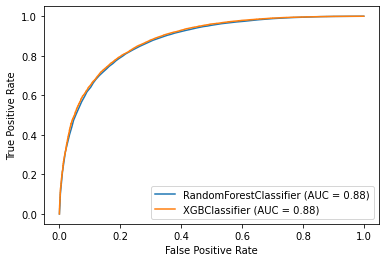

In [88]:
# Plot roc curve to compare results just in case
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, X_test, y_test, ax=ax)
plt.show()

***
# Comment on the simple models
* ## Overall both models performed similarly.
* ## Since the data is imbalanced the "f1" score is not a perfect metric.
* ## I also looked at confusion matrices.
* ## Based on the confusion matrices both models are doing just fine on False Positives and False Negatives numbers.
* ## I will use Oversampling and Undersampling to balance the data and see weather it will improve the performance.
***

***
# OverUnderSampling
***

In [89]:
clf_Forest = RandomForestClassifier()
clf_XGBoost = XGBClassifier()

In [90]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import make_pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('0',over),('u',under)]
pipeline = make_pipeline(SMOTE(),RandomUnderSampler())
X_train,y_train = pipeline.fit_resample(X_train,y_train)
counter = Counter(y_train)
print(counter)


Counter({0: 54082, 1: 54082})


In [91]:
details = {'name':[],'f1':[],'precision':[],'recall':[],'roc_auc_score':[], 'accuracy':[]} # create empty dictionary to hold results
classifiers = [clf_Forest, clf_XGBoost] # array of classifiers
for clf in classifiers:# use loop to train "vanilla" classifiers and update 'details'
    print(f"Working on {str(clf)}")
    results = assessClassifier(clf, allValues)
    clf.fit(allValues[0],allValues[2])

    y_pred = clf.predict(X_test)
    print("\n", "*"*50, "\nConfusion Matrix \n", confusion_matrix(y_test,y_pred), '\n')
    print(classification_report(y_test,y_pred))
    for item in results.keys():
        details[item].append(results[item])

Working on RandomForestClassifier()

 ************************************************** 
Confusion Matrix 
 [[ 5496  5039]
 [ 1630 31473]] 

              precision    recall  f1-score   support

           0       0.77      0.52      0.62     10535
           1       0.86      0.95      0.90     33103

    accuracy                           0.85     43638
   macro avg       0.82      0.74      0.76     43638
weighted avg       0.84      0.85      0.84     43638

Working on XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              s

In [92]:
df2 = pd.DataFrame(details) # create data frame with results
df2 # print results

,name,f1,precision,recall,roc_auc_score,accuracy
0,RandomForestClassifier,0.904073,0.861580,0.950975,0.737219,0.847186
1,XGBClassifier,0.905434,0.871689,0.941896,0.754726,0.851016


***
## End OverUnderSampling
* ## Oversampling and undersampling don't improve the results
* ## I will tune up the models to see if it improves the results
***

In [93]:
cv = 5
scoring = 'f1'
values = (X_train, X_test, y_train, y_test)
random_state =10

***
##  Tuning Random forest 
***

In [94]:
param_grid_rf = [{'bootstrap':[True],'n_estimators':[3,5,10,20,30,50,80,120],
    'max_features':['sqrt'],
    'max_depth' : [5,10,20, 30, 40, 50 ,60 , 70],
    'criterion':['gini', 'entropy']},]
random_forest = testClassifier(RandomForestClassifier(random_state=random_state), param_grid=param_grid_rf, scoring=scoring, values=values)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 48.2min finished


**************************************************
** Results for Training Data **
**************************************************
[[54081     1]
 [    0 54082]] : is the confustion matrix

0.9999907547797788 : is the accuracy score
0.9999815099014477 : is the precision score
1.0 : is the recall score
0.9999907548652521 : is the f1 score
**************************************************
**************************************************
** Results for Testing Data **
** not used for training/validation **
**************************************************
[[ 6972  3563]
 [ 3529 29574]] : is the confustion matrix

0.8374810944589578 : is the accuracy score
0.892476687690497 : is the precision score
0.8933933480349213 : is the recall score
0.8929347826086956 : is the f1 score
**************************************************


In [95]:
y_pred = random_forest.predict(X_test) # print more detailed classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     10535
           1       0.89      0.89      0.89     33103

    accuracy                           0.84     43638
   macro avg       0.78      0.78      0.78     43638
weighted avg       0.84      0.84      0.84     43638



***
## xgboost tune up
***

In [96]:
param_grid_xgb = {
    'max_depth':range(2,10,2),
    'n_estimators': range(20,60,20),
    'learning_rate': [0.1, 0.01, 0.05]
}
xgboost = testClassifier(XGBClassifier(random_state=random_state),
                        param_grid=param_grid_xgb,
                        scoring=scoring,
                        values=values)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 16.1min finished


**************************************************
** Results for Training Data **
**************************************************
[[47331  6751]
 [ 5401 48681]] : is the confustion matrix

0.8876520838726378 : is the accuracy score
0.8782111415788714 : is the precision score
0.9001331311711845 : is the recall score
0.8890370180981426 : is the f1 score
**************************************************
**************************************************
** Results for Testing Data **
** not used for training/validation **
**************************************************
[[ 6941  3594]
 [ 3760 29343]] : is the confustion matrix

0.831477152940098 : is the accuracy score
0.8908825940431734 : is the precision score
0.8864151285381989 : is the recall score
0.8886432465172622 : is the f1 score
**************************************************


In [97]:
y_pred = xgboost.predict(X_test) # print more detailed classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65     10535
           1       0.89      0.89      0.89     33103

    accuracy                           0.83     43638
   macro avg       0.77      0.77      0.77     43638
weighted avg       0.83      0.83      0.83     43638



***
#  Comments on Vanilla Classifiers 
### Iconfusion_matrixuse Logistic Regression, Random Forest, and XGB classifiers<br> for tune ups and comparison since the have the highest f1 scores.
***

***
# Conclusion
***

# Ways to improve the prject
* Optimize the code by creating pipelines. This will make the project better and it would be easier to use and tune up different classifiers.
* It would be good to try feature engineering but it is hard without being an expert in the subject matter.
* Dive deeper into the tuning of the models to improve results for the precision score while keeping recall score high.